<a href="https://colab.research.google.com/github/Srabontideb/Basic_Neural_network_Algorithms/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

#Build-in function
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

### Euclidean distance calculation

In [ ]:
def euclidean_distance(x1, y1, x2, y2):
    return math.sqrt((x1-x2)**2 +(y1-y2)**2)

### knn-predict function

In [ ]:
def knn_predict(train_data, x, y, k):
    distances = []

    for i in train_data:
        this_distance = euclidean_distance(i[0], i[1], x, y)
        distances.append((this_distance, i[2]))

    distances = sorted(distances)[:k]

    class_one_votes = 0
    class_two_votes = 0

    for d in distances:
        if d[1] == 0:
            class_one_votes += 1
        else:
            class_two_votes += 1

    return 0 if class_one_votes > class_two_votes else 1

### Dataset Preparation

In [ ]:
def generate_points(num_points, x_range, y_range):
    points = []
    for _ in range(num_points):
        x = random.uniform(x_range[0], x_range[1])
        y = random.uniform(y_range[0], y_range[1])
        points.append((x, y))
    return points

class_one_points = 1000
class_one_x_range = (1, 7)
class_one_y_range = (5, 12)
class_one = generate_points(class_one_points, class_one_x_range, class_one_y_range)

class_two_points = 1000
class_two_x_range = (3, 10)
class_two_y_range = (3, 10)
class_two = generate_points(class_two_points, class_two_x_range, class_two_y_range)

data = []
for point in class_one:
    data.append((point[0], point[1], 0))
for point in class_two:
    data.append((point[0], point[1], 1))

random.shuffle(data)
split_idx = int(0.7 * len(data))
train_data = data[:split_idx]
test_data = data[split_idx:]

### Updated Dataset Generation

In [ ]:
def generate_points(num_points, x_range, y_range):
    points = []
    for _ in range(num_points):
        # Generate a random number between 0 and 1 to determine which distribution to use
        p = random.uniform(0, 1)
        if p < 0.2:
            # Use a uniform distribution
            x = random.uniform(x_range[0], x_range[1])
            y = random.uniform(y_range[0], y_range[1])
        elif p < 0.6:
            # Use a Gaussian distribution
            mean_x = (x_range[0] + x_range[1]) / 2
            mean_y = (y_range[0] + y_range[1]) / 2
            stddev = 0.3 * (x_range[1] - x_range[0])
            x = np.random.normal(mean_x, stddev)
            y = np.random.normal(mean_y, stddev)
        else:
            # Use a circular distribution
            r = random.uniform(0, (x_range[1] - x_range[0]) / 2)
            theta = random.uniform(0, 2 * np.pi)
            x = r * np.cos(theta) + (x_range[1] + x_range[0]) / 2
            y = r * np.sin(theta) + (y_range[1] + y_range[0]) / 2
        points.append((x, y))
    return points

class_one_points = 200
class_one_x_range = (1, 100)
class_one_y_range = (10, 120)
class_one = generate_points(class_one_points, class_one_x_range, class_one_y_range)

class_two_points = 200
class_two_x_range = (25, 150)
class_two_y_range = (50, 200)
class_two = generate_points(class_two_points, class_two_x_range, class_two_y_range)

data = []
for point in class_one:
    data.append((point[0], point[1], 0))
for point in class_two:
    data.append((point[0], point[1], 1))

random.shuffle(data)
split_idx = int(0.7 * len(data))
train_data = data[:split_idx]
test_data = data[split_idx:]

### Plot the full dataset

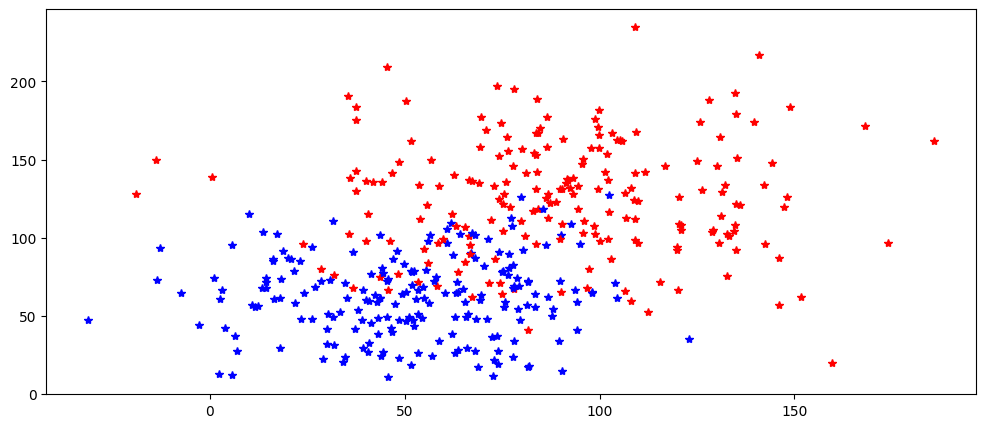

In [ ]:
# Plot the full dataset
plt.figure(figsize=(12, 5))
for point in data:
    if point[2] == 0:
        plt.plot(point[0], point[1], "b*")
    else:
        plt.plot(point[0], point[1], "r*")
plt.show()

In [ ]:
# Calculate accuracy
correct = 0
for test_point in test_data:
    predicted_class = knn_predict(train_data, test_point[0], test_point[1], 3)
    if predicted_class == test_point[2]:
        correct += 1
accuracy = correct / len(test_data)

print("Accuracy:", accuracy)

Accuracy: 0.85


### Testing with random input

Please provide x coordinate of your point: 30
Please provide y coordinate of your point: 120
Your given point belongs to class two


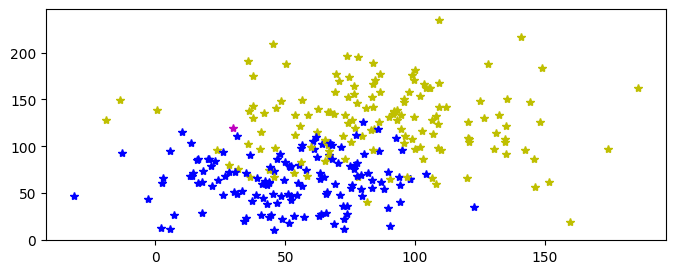

In [ ]:
# Plot the points
plt.figure(figsize=(8, 3))

for point in train_data:
    if point[2] == 0:
        plt.plot(point[0], point[1], "b*")
    else:
        plt.plot(point[0], point[1], "y*")

x = float(input("Please provide x coordinate of your point: "))
y = float(input("Please provide y coordinate of your point: "))
predicted_class = knn_predict(train_data, x, y, 3)

if predicted_class == 0:
    print("Your given point belongs to class one")
    plt.plot(x, y, "m*")
else:
    print("Your given point belongs to class two")
    plt.plot(x, y, "m*")

plt.show()

# Buildin KNN Classifier

In [ ]:
X_train = [point[:2] for point in train_data]
y_train = [point[2] for point in train_data]

X_test = [point[:2] for point in test_data]
y_test = [point[2] for point in test_data]

# Training the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predicting on the test data
y_pred = knn.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.85
